In [117]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [118]:
# import csv in to a data frame
df = pd.read_csv('~/Documents/WGU/D600/Task 3/D600 Task 3 Dataset 1 Housing Information.csv')

In [119]:
# D1. define the dependent and independent variables
predictors = ['SquareFootage', 'BackyardSpace', 'CrimeRate', 'SchoolRating', 
              'AgeOfHome', 'DistanceToCityCenter', 'EmploymentRate',
              'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities',
              'TransportAccess']

outcome = 'Price'

X = df[predictors]
y = df[outcome]

In [120]:
# D2. standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# export the dataset after standardizing predictor variables
X_scaled_df.to_csv('standardized_predictors.csv', index=False)
print("\nStandardized predictor variables exported as 'standardized_predictors.csv'.")


Standardized predictor variables exported as 'standardized_predictors.csv'.


In [121]:
# D3. descriptive analytics of all numeric continuous variables
numeric_cols = ['Price','SquareFootage', 'BackyardSpace', 'CrimeRate', 'SchoolRating', 
                'AgeOfHome', 'DistanceToCityCenter', 'EmploymentRate', 'PropertyTaxRate', 
                'RenovationQuality', 'LocalAmenities', 'TransportAccess']

# descriptive stats for continuous numeric variables
num_df = new_df[numeric_cols]
counts = num_df.count()
means  = num_df.mean()
modes  = num_df.mode().iloc[0]
mins   = num_df.min()
maxs   = num_df.max()
ranges = maxs - mins

summary = pd.DataFrame({
    'Count': counts,
    'Mean' : means,
    'Mode' : modes,
    'Min'  : mins,
    'Max'  : maxs,
    'Range': ranges,
})
print(summary)

                      Count           Mean      Mode       Min         Max  \
Price                  7000  307281.972151  85000.00  85000.00  1046675.64   
SquareFootage          7000    1048.947459    550.00    550.00     2874.70   
BackyardSpace          7000     511.507029    300.08      0.39     1631.36   
CrimeRate              7000      31.226194     34.01      0.03       99.73   
SchoolRating           7000       6.942923     10.00      0.22       10.00   
AgeOfHome              7000      46.797046     18.18      0.01      178.68   
DistanceToCityCenter   7000      17.475337      8.29      0.00       65.20   
EmploymentRate         7000      93.711349     99.90     72.05       99.90   
PropertyTaxRate        7000       1.500437      1.43      0.01        3.36   
RenovationQuality      7000       5.003357     10.00      0.01       10.00   
LocalAmenities         7000       5.934579     10.00      0.00       10.00   
TransportAccess        7000       5.983860     10.00      0.01  

In [122]:
# E1. apply PCA and determine the matrix of all principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_components_matrix = pd.DataFrame(pca.components_,
                                     columns=numerical_cols,
                                     index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(pca_components_matrix)

# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


      SquareFootage  BackyardSpace  CrimeRate  SchoolRating  AgeOfHome  \
PC1        0.360353       0.131750  -0.182493      0.454885  -0.200683   
PC2       -0.200792      -0.041152   0.160342     -0.237023   0.026220   
PC3       -0.129012      -0.045597  -0.268588      0.166877   0.486696   
PC4        0.491859      -0.104870   0.599441      0.077051   0.359599   
PC5        0.067258       0.965648   0.079740     -0.151776   0.117163   
PC6        0.073333       0.121829  -0.417366     -0.012870  -0.083169   
PC7        0.121769      -0.046644  -0.467413      0.043217   0.614761   
PC8        0.167612      -0.012740  -0.242282      0.125539  -0.436792   
PC9        0.684277      -0.126252  -0.196329     -0.549855  -0.059028   
PC10       0.031653      -0.006376   0.001677      0.004669   0.001873   
PC11      -0.221812      -0.047271  -0.115076     -0.599936  -0.001816   

      DistanceToCityCenter  EmploymentRate  PropertyTaxRate  \
PC1              -0.257124        0.209682      

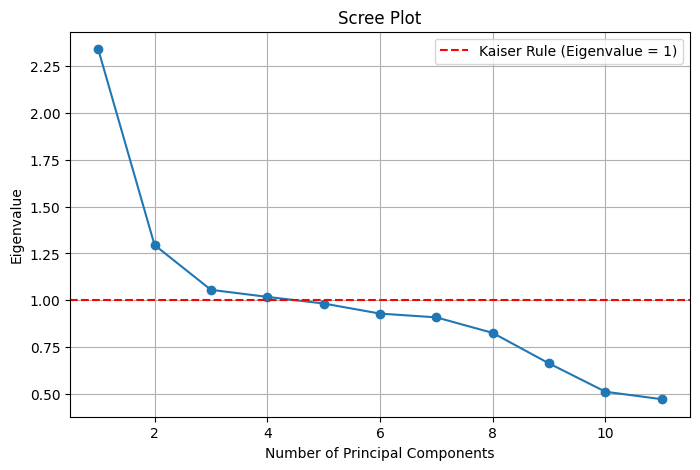

Number of components to retain (Kaiser Rule, eigenvalues > 1): 4
Based on Kaiser Rule, retaining 4 principal components.


In [123]:
# E2. identify the total number of PCs using the Kaiser rule (eigenvalues > 1)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='red', linestyle='--', label='Kaiser Rule (Eigenvalue = 1)')
plt.legend()
plt.grid(True)
plt.show()

# Kaiser rule: retain components with eigenvalues > 1
n_components_kaiser = np.sum(pca.explained_variance_ > 1)
print(f"Number of components to retain (Kaiser Rule, eigenvalues > 1): {n_components_kaiser}")

# set n_components_to_retain based on Kaiser rule
n_components_to_retain = n_components_kaiser

# ensure n_components_to_retain is not zero or greater than available components
if n_components_to_retain <= 0:
    print("Warning: Kaiser rule suggested 0 or fewer components. Defaulting to 1 component.")
    n_components_to_retain = 1
elif n_components_to_retain > pca.n_components_:
    print(f"Warning: Kaiser rule suggested {n_components_to_retain} components, but only {pca.n_components_} available. Using all available components.")
    n_components_to_retain = pca.n_components_

print(f"Based on Kaiser Rule, retaining {n_components_to_retain} principal components.")

In [124]:
# E3. identify the variance of each of the principal components identified in part E2
explained_variance_retained = pca.explained_variance_[:n_components_to_retain]
for i, var in enumerate(explained_variance_retained):
    print(f"PC{i+1}: {var:.4f}")

PC1: 2.3396
PC2: 1.2947
PC3: 1.0558
PC4: 1.0182


In [125]:
# E4. summary results for PCA
print(f"Original number of features: {X.shape[1]}") # Use X.shape[1] from original features
print(f"Total number of principal components computed: {pca.n_components_}")
print(f"Explained variance ratio of first {n_components_to_retain} components:")
for i in range(n_components_to_retain):
    print(f"  PC{i+1}: {explained_variance_ratio[i]*100:.2f}%")
print(f"Cumulative explained variance: {cumulative_explained_variance[n_components_to_retain-1]*100:.2f}%")

# transform the data to the retained principal components
pca_final = PCA(n_components=n_components_to_retain)
X_pca = pca_final.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_to_retain)], index=X.index)

Original number of features: 11
Total number of principal components computed: 11
Explained variance ratio of first 4 components:
  PC1: 21.27%
  PC2: 11.77%
  PC3: 9.60%
  PC4: 9.25%
Cumulative explained variance: 51.89%


In [126]:
# F1. split the dataset to training (60%) and validation set (40%)
y_aligned = y.loc[X_pca_df.index]

X_train, X_val, y_train, y_val = train_test_split(X_pca_df, y_aligned, test_size=0.4, random_state=42)

print(f"Training set features shape: {X_train.shape}")
print(f"Validation set features shape: {X_val.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Validation set target shape: {y_val.shape}")

# export the files for training and validation
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)

train_df.to_csv('trainingset.csv', index=False)
val_df.to_csv('validationset.csv', index=False)
print("\nTraining and validation datasets exported as 'trainingset.csv' and 'validationset.csv'.")

Training set features shape: (4200, 4)
Validation set features shape: (2800, 4)
Training set target shape: (4200,)
Validation set target shape: (2800,)

Training and validation datasets exported as 'trainingset.csv' and 'validationset.csv'.


In [127]:
# F2. linear regression model using backward stepwise elimination
def backward_stepwise_regression(X_data, y_data, significance_level=0.05):
    selected_features = list(X_data.columns)

    print("\n--- Starting Backward Stepwise Regression ---")

    while True:
        X_with_const = sm.add_constant(X_data[selected_features])
        model_current = sm.OLS(y_data, X_with_const).fit()

        p_values = model_current.pvalues.drop('const', errors='ignore')

        if p_values.empty:
            print("No more features to evaluate or only constant term remains.")
            break

        max_p_value = p_values.max()
        feature_to_remove = p_values.idxmax()

        if max_p_value > significance_level:
            print(f"Removing '{feature_to_remove}' with p-value: {max_p_value:.4f}")
            selected_features.remove(feature_to_remove)
            if not selected_features:
                print("All significant features removed or no features left (only constant would remain).")
                break
        else:
            print(f"No feature with p-value > {significance_level} found. Stopping.")
            break

    print("--- Backward Stepwise Regression Finished ---")

    final_X = sm.add_constant(X_data[selected_features])
    final_model_results = sm.OLS(y_data, final_X).fit()
    return final_model_results

# run backward stepwise regression on training set
optimized_results = backward_stepwise_regression(X_train, y_train, significance_level=0.05)

print("\n--- Backward Stepwise Regression Model Results Summary ---")
print(optimized_results.summary())
print("\n" + "="*40 + "\n")

print("--- H. Extracted Key Statistics (from Backward Stepwise Optimized Model) ---")
print(f"Optimized Model R-squared: {optimized_results.rsquared:.4f}")
print(f"Optimized Model Adjusted R-squared: {optimized_results.rsquared_adj:.4f}")
print(f"Optimized Model F-statistic: {optimized_results.fvalue:.4f}")
print(f"Optimized Model Prob (F-statistic): {optimized_results.f_pvalue:.4f}")

print("\n--- H. Coefficient Estimates and P-values (from Backward Stepwise Optimized Model) ---")
for feature, coeff in optimized_results.params.items():
    p_val = optimized_results.pvalues[feature]
    print(f"Variable: {feature:<10} | Coefficient: {coeff:.4f} | P-value: {p_val:.4f}")

# mean squared error (MSE) of the optimized model used on the training set
optimal_features_for_mse = [f for f in optimized_results.params.index if f != 'const']

# ensure X_train is filtered to only include the optimal features for prediction
X_train_optimal_for_pred = sm.add_constant(X_train[optimal_features_for_mse], has_constant='add')
y_train_pred = optimized_results.predict(X_train_optimal_for_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"\nMean Squared Error (MSE) on Training Set: {mse_train:.2f}")


--- Starting Backward Stepwise Regression ---
No feature with p-value > 0.05 found. Stopping.
--- Backward Stepwise Regression Finished ---

--- Backward Stepwise Regression Model Results Summary ---
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     707.7
Date:                Sat, 12 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:11:29   Log-Likelihood:                -54948.
No. Observations:                4200   AIC:                         1.099e+05
Df Residuals:                    4195   BIC:                         1.099e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
         

In [128]:
# F4. evaluate the optimized model on the validation set
print("\n--- Evaluating Optimized Model on Validation Set ---")

missing_val_features_val = [f for f in optimal_features_for_mse if f not in X_val.columns]

if not optimal_features_for_mse:
    print("Warning: No optimal features were selected by backward elimination. Cannot perform prediction on validation set meaningfully.")
elif missing_val_features_val:
    print(f"Error: The following optimal features are missing in the validation set: {missing_val_features_val}")
    print("Cannot predict accurately on validation set.")
else:
    X_val_optimal_for_pred = sm.add_constant(X_val[optimal_features_for_mse], has_constant='add')
    try:
        y_val_pred = optimized_results.predict(X_val_optimal_for_pred)
        mse_val = mean_squared_error(y_val, y_val_pred)
        r2_val = r2_score(y_val, y_val_pred)
        print(f"Mean Squared Error (MSE) on Validation Set: {mse_val:.2f}")
        print(f"R-squared on Validation Set: {r2_val:.4f}")
    except Exception as e:
        print(f"An error occurred during validation set prediction: {e}")



--- Evaluating Optimized Model on Validation Set ---
Mean Squared Error (MSE) on Validation Set: 13637998389.64
R-squared on Validation Set: 0.3907


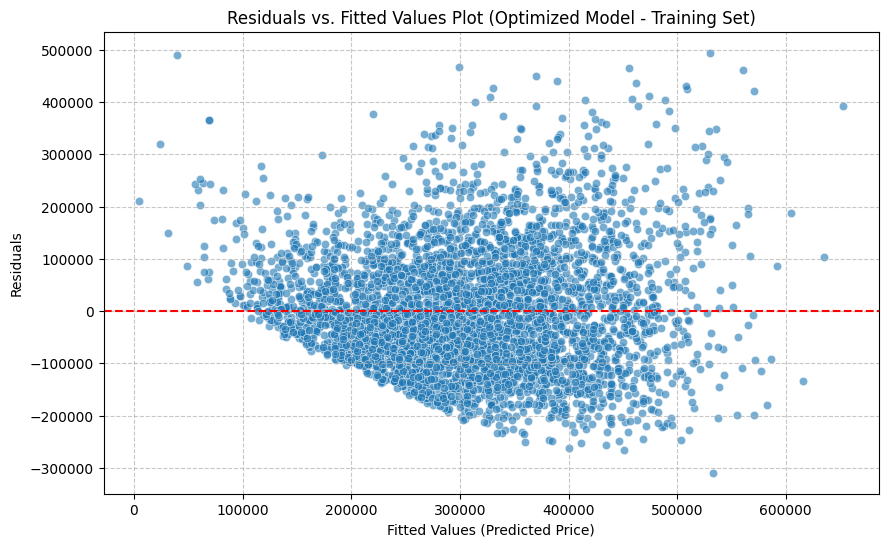

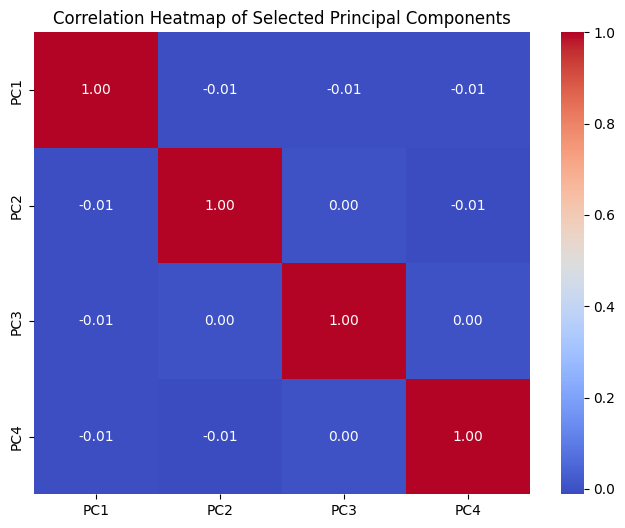

In [129]:
# G3. verification of assumptions

# linearity assumption check: residuals vs fitted values plot
selected_features_for_plots = [f for f in optimized_results.params.index if f != 'const']
X_train_for_prediction = sm.add_constant(X_train[selected_features_for_plots], has_constant='add')
y_pred_train_optimized = optimized_results.predict(X_train_for_prediction)
residuals_train_optimized = optimized_results.resid # Residuals are directly available from optimized_results

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_train_optimized, y=residuals_train_optimized, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted Price)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot (Optimized Model - Training Set)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# multicollinearity assumption check: correlation heatmap
# get the independent variables used in the optimized model (excluding the constant)
X_train_optimized_no_const = X_train[selected_features_for_plots]

if X_train_optimized_no_const.empty:
    print("\nNo independent variables left after optimization (only constant). No multicollinearity to check on features.")
else:
    plt.figure(figsize=(8, 6))
    sns.heatmap(X_train_optimized_no_const.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap of Selected Principal Components")
    plt.show()
